In [1]:
import numpy as np
import matplotlib.pyplot as plt
import threebody
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
## 1000 timestamp = 1 second. 
## This will be adjusted with actual FPS (frame per second)

dt = 0.001 
FPS = 1000 
assert (dt * FPS -1) < 0.01

In [3]:
# Some initial condition (that I like)
celbody1 = threebody.body(1,[-1,    0], [0,     -1])
celbody2 = threebody.body(1,[-.5,   1], [1,     1])
celbody3 = threebody.body(1,[2,     0], [0,     0])

system = threebody.three_body_system(celbody1, celbody2, celbody3)

In [4]:
duration = 100 # in secounds

for i in range(duration * FPS):
    system.update(dt=dt, method="LF")

In [5]:
# Due to the implementation, the trajectory should be trimmed.
trajectories = system.trajectory[:,:system.timestamp+1,:]

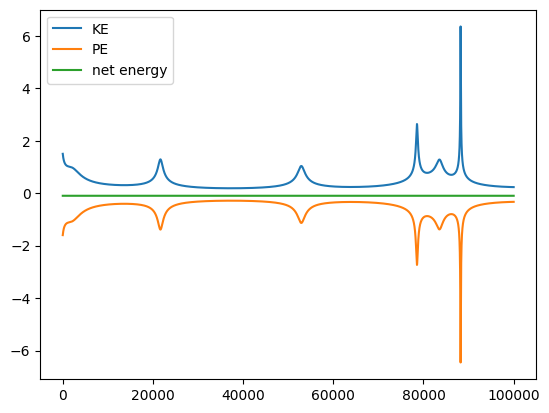

In [6]:
## Check the energy conservation 
plt.plot(system.energy_history[:system.timestamp+1], 
         label=["KE", "PE"])
plt.plot(np.sum(system.energy_history[:system.timestamp+1], axis=1), label="net energy")
plt.legend()
plt.show()

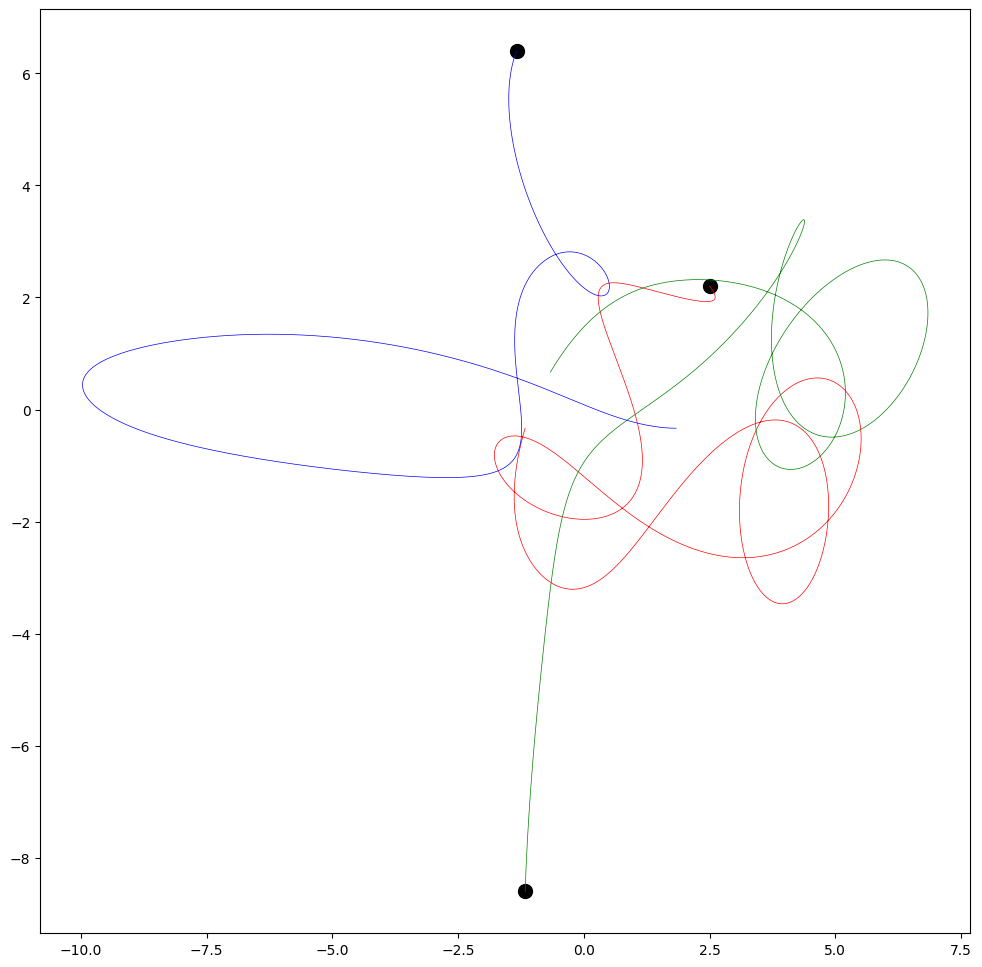

In [7]:
fig, ax = plt.subplots(figsize=(12, 12))
# make a scatter plot.
# set scatter point size to be very small

lw = .5
ax.plot(trajectories[0,:,0], trajectories[0,:,1], linewidth=lw, c='r')
ax.plot(trajectories[1,:,0], trajectories[1,:,1], linewidth=lw, c='g')
ax.plot(trajectories[2,:,0], trajectories[2,:,1], linewidth=lw, c='b')

numlim = -1
ax.scatter(trajectories[0,numlim,0], trajectories[0,numlim,1], s = 100, c='k')
ax.scatter(trajectories[1,numlim,0], trajectories[1,numlim,1], s = 100, c='k')
ax.scatter(trajectories[2,numlim,0], trajectories[2,numlim,1], s = 100, c='k')

# # plt.axis('off')
plt.show()

In [ ]:
# This cell is some preparatory trial for the further project

fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim(-11,8)
ax.set_ylim(-10,9)

lines = [ax.plot([], [])[0] for _ in range(3)]

def update(frame):
    frame = frame * 1000
    for i in range(3):
        lines[i].set_data(trajectories[i, :frame, 0], trajectories[i, :frame, 1])
    return lines

anim=HTML(FuncAnimation(fig, update, frames=100, blit=True).to_jshtml())

with open('html_file.html', 'w') as f:
    f.write(anim.data)